In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [18]:
x1 = np.load('../Data/tas_train.npy')
x2 = np.load('../Data/psl_train.npy')
y = np.load('../Data/nao_index_train.npy')

file = '../Data/tas_train.nc'
data_in = nc.Dataset(file, 'r')
x1_nc = data_in.variables['var1'].__array__().data
lat = nc.Dataset(file, 'r').variables['lat'].__array__().data
lon = nc.Dataset(file, 'r').variables['lon'].__array__().data
N,D1,D2 = x1_nc.shape
x1_nc_resh = np.reshape(x1_nc,[N,D1*D2])

In [20]:
# check reshaping
x1_nc_2 = np.reshape(x1_nc_resh,[N,D1,D2])
np.mean(x1_nc_resh-x1), np.mean(x1_nc-x1_nc_2)

(-2.3248515601702873e-13, 0.0)

In [39]:
# prepare PCA
n_comp_pca = 1
pca = PCA(n_components=n_comp_pca)

In [40]:
pca.fit(np.transpose(x1))
print(pca.explained_variance_ratio_.sum())
eofs_x1 = pca.transform(np.transpose(x1))
eofs_x1_resh = np.reshape(eofs_x1,[D1,D2,n_comp_pca])

0.10864628742076353


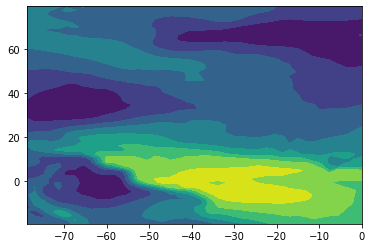

In [46]:
# plot 1st EOF pattern
plt.contourf(lon,lat,eofs_x1_resh[:,:,0])
plt.colorbar

In [47]:
plt.colorbar?

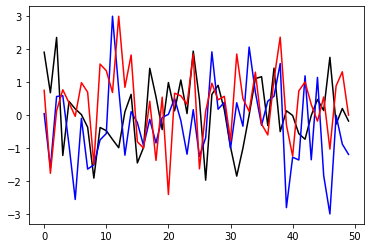

In [14]:
# plot data + principal component of first EOF
plt.contourf(lon,lat)
plt.plot(X[0:50],pc_x1[0,0:50], '-b');
plt.plot(X[0:50],pc_x2[0,0:50], '-r');

In [15]:
# correlation of NAO vs. principal components
#np.array(y)
y_pc_x1 = np.concatenate([np.reshape(y,[900,1]),np.transpose(pc_x1)], axis=1)
y_pc_x2 = np.concatenate([np.reshape(y,[900,1]),np.transpose(pc_x2)], axis=1)
cc_1 = np.corrcoef(y_pc_x1, y=None, rowvar=False)
cc_2 = np.corrcoef(y_pc_x2, y=None, rowvar=False)
cc_1.shape

(51, 51)

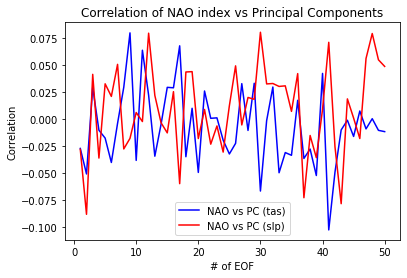

In [16]:
# plot correlations
X_pc = np.array(range(1, cc_1.shape[0]))
plt.plot(X_pc, cc_1[0,1:], 'b', label='NAO vs PC (tas)')
plt.plot(X_pc, cc_2[0,1:], 'r', label='NAO vs PC (slp)')
plt.title ('Correlation of NAO index vs Principal Components')
plt.xlabel ('# of EOF')
plt.ylabel ('Correlation')
plt.legend()
plt.savefig('../Plots/correlation_NAO_vs_PCs.pdf')
